In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsmath}',
    'text.usetex': True,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica']
})

# Solve Poisson eq

In [2]:
def relax_f(f,X,Y,max_iter=int(1e5),rho=lambda t1,t2: np.full_like(t1,0),aeps=1e-20,reps=1e-2):
    dx = X[0,1] - X[0][0]
    dy = Y[1,0] - Y[0,0]
    
    rho_ = rho(X,Y)[1:-1,1:-1]
    for i in range(max_iter):
        f1 = f.copy()
        
        fm0 = f1[:-2,1:-1]
        fp0 = f1[2:,1:-1]
        f0m = f1[1:-1,:-2]
        f0p = f1[1:-1,2:]
        
        f1[1:-1,1:-1] = 0.5/(1/dx**2 + 1/dy**2)*((fm0 + fp0)/dx**2 + (f0m + f0p)/dy**2 + rho_)
        
        adiff = f1 - f
        rdiff = adiff/(f + 1e-100)
    
        f = f1.copy()
        
        if np.all(np.abs(adiff) < aeps) or np.all(np.abs(rdiff) < reps):
            print(i)
            break
            
    return f

### Part 1

In [3]:
xa,xb,Nx = 0,1,50
ya,yb,Ny = 0,1,50

x   = np.linspace(xa,xb,Nx)
y   = np.linspace(ya,yb,Ny)
X,Y = np.meshgrid(x,y)

f0 = np.zeros((Nx,Ny))
f0[-1,:] = 10

# dx = x[1] - x[0]
# dy = y[1] - y[0]

In [4]:
f = relax_f(f0,X,Y)

453


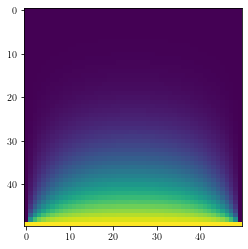

In [5]:
plt.imshow(f)
plt.show()

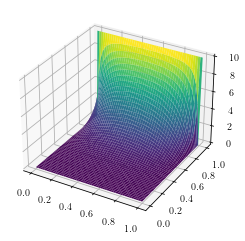

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, f,cmap='viridis')
plt.show()

### Part 2

In [7]:
def rho(x,y,x0=1/3,y0=1/3,sig=1,q=10):
    return q*np.exp(-((x-x0)**2 + (y-y0)**2)/2/sig**2)/(2*np.pi*sig**2)#360*(np.isclose(x,1/3))*(np.isclose(y,1/3))

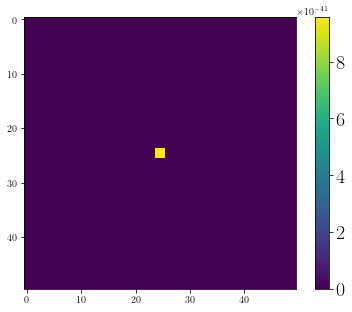

In [8]:
nrows,ncols = 1,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

img  = ax.imshow(rho(X,Y,x0=0.5,y0=0.5,sig=0.001,q=1),cmap='viridis')

cbar = fig.colorbar(img)
cbar.ax.tick_params(labelsize=20)

plt.show()

In [9]:
xa,xb,Nx = 0,1,100
ya,yb,Ny = 0,1,100

x   = np.linspace(xa,xb,Nx)
y   = np.linspace(ya,yb,Ny)
X,Y = np.meshgrid(x,y)

f0 = np.zeros((Nx,Ny))
f0[-1,:] = 10

dx = x[1] - x[0]
dy = y[1] - y[0]

In [14]:
f = relax_f(f0,X,Y,rho=lambda t1,t2: rho(t1,t2,x0=1/3,y0=1/3,sig=0.001,q=1))

964


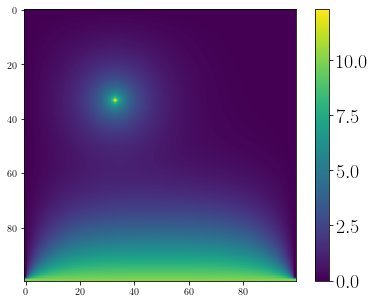

In [15]:
nrows,ncols = 1,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

img  = ax.imshow(f,cmap='viridis')

# ticks = [0,1,2,3,4,5]
# ax.set_xticks(ticks,[r'$%d$'%_ for _ in ticks])
# ax.set_yticks(ticks,[r'$%d$'%_ for _ in ticks])
# ax.tick_params(axis='both',which='major',direction='out',labelsize=20)
# ax.set_title(r'$\displaystyle \int_{-\infty}^{\infty} {\rm d}{x} \, \tilde{\psi}^{*}_{n}(x) \tilde{\psi}_{m}(x)$',size=25,pad=30)
# ax.set_xlabel(r'$n$',size=30)
# ax.set_ylabel(r'$m$',size=30)

cbar = fig.colorbar(img)
cbar.ax.tick_params(labelsize=20)
# ticks = [0,-5,-10,-15]
# cbar.ax.set_yticks(ticks,[r'$1$']+[r'$10^{%d}$'%_ for _ in ticks[1:]])

plt.show()

In [ ]:
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# ax.plot_surface(X,Y,f,cmap='viridis')
# plt.show()

In [26]:
def test(x):
    return 0

In [27]:
test(np.array([0,1]))

0